In [33]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import linear_model, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB

In [34]:
df = pd.read_csv("outputfullstack_with_text.csv", encoding = "utf-8")
# for column
df['Text'] = df['Text'].replace(np.nan, 'VIDE')
df.head()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text
0,1,Hauts-de-Seine,Responsable Applicatif BI (Business Intelligence),TalentsIt,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE
1,2,Hauts-de-Seine,ANALYSTE BUSINESS INTELLIGENCE H/F,Janssen,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE
2,3,Hauts-de-Seine,Stage Chargé de e-commerce H/F - Paris,Jobmania,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE
3,4,Hauts-de-Seine,Stage Business Intelligence Analyst H/F,Costa Croisières,http://www.indeed.fr/company/Costa-Crociere/jo...,business+intelligence,VIDE
4,5,Hauts-de-Seine,Chargé Business Dévelopment H/F,Impact Sales & Marketing,http://www.indeed.fr/company/Impact-Field-Mark...,business+intelligence,VIDE


In [35]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('french')

In [36]:
#lowercase
df["Text_1"] = df.Text.str.lower()
#remove \n
df["Text_2"] = df.Text_1.str.replace("\\n", " ")
#remove punctuation and tokenize
df["Tokens"] = df.apply(lambda row: tokenizer.tokenize(row['Text_2']), axis=1)
#remove stopwords
df['Tokens_1'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])
#merge tokens back into string text
df['Text_3']=[" ".join(txt) for txt in df["Tokens_1"].values]
#create bigrams
df["Tokens_2"] = df["Tokens_1"].apply(lambda row: list(ngrams(row, 2)))
df.tail()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2
1556,1557,Paris,Développeur full-stack pour l'analyse automati...,Inria,http://www.indeed.fr/rc/clk?jk=fd1e855853084bd...,développeur+full+stack,VIDE,vide,vide,[vide],[vide],vide,[]
1557,1558,Paris,Stage Développeur Full-Stack,Activops,http://www.indeed.fr/rc/clk?jk=e4da08e1323b1c7...,développeur+full+stack,VIDE,vide,vide,[vide],[vide],vide,[]
1558,1559,Paris,Stage de pré-embauche Développeur Full Stack J...,Jobmania,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,développeur+full+stack,VIDE,vide,vide,[vide],[vide],vide,[]
1559,1560,Paris,Développeur Full Stack JS,Experene,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,développeur+full+stack,"ExpereneCréée en 2017, Experene est une sociét...","experenecréée en 2017, experene est une sociét...","experenecréée en 2017, experene est une sociét...","[experenecréée, en, 2017, experene, est, une, ...","[experenecréée, 2017, experene, société, conse...",experenecréée 2017 experene société conseil se...,"[(experenecréée, 2017), (2017, experene), (exp..."
1560,1561,Paris,Développeur Full Stack H/F,Perfmaker,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,développeur+full+stack,Le poste : Vous travaillerez en étroite collab...,le poste : vous travaillerez en étroite collab...,le poste : vous travaillerez en étroite collab...,"[le, poste, vous, travaillerez, en, étroite, c...","[poste, travaillerez, étroite, collaboration, ...",poste travaillerez étroite collaboration fonda...,"[(poste, travaillerez), (travaillerez, étroite..."


In [38]:
df.to_csv("/home/auredata/Tokenized.csv", encoding='utf-8')

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df.job_class)
y

array([0, 0, 0, ..., 4, 4, 4])

In [6]:
v = TfidfVectorizer(max_features=100)
#v.fit(df.iloc[0:3,7])
x = df["Text_3"]
v.fit(x)
#print(v.vocabulary_)
#print(v2.vocabulary_.get("analytical"))
v2={}
for a, b in v.vocabulary_.items():
    v2[b] = a

In [7]:
print(v2.get(71))

proposant


In [8]:
x_tfidf = v.transform(x)

print(v)
print(x_tfidf)
x = v.fit_transform(df["Text_3"])
print(x)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
  (0, 95)	1.0
  (1, 95)	1.0
  (2, 95)	1.0
  (3, 95)	1.0
  (4, 95)	1.0
  (5, 95)	1.0
  (6, 95)	1.0
  (7, 95)	1.0
  (8, 95)	1.0
  (9, 95)	1.0
  (10, 95)	1.0
  (11, 95)	1.0
  (12, 95)	1.0
  (13, 95)	1.0
  (14, 95)	1.0
  (15, 95)	1.0
  (16, 95)	1.0
  (17, 95)	1.0
  (18, 95)	1.0
  (19, 95)	1.0
  (20, 95)	1.0
  (21, 95)	1.0
  (22, 95)	1.0
  (23, 95)	1.0
  (24, 95)	1.0
  :	:
  (1560, 38)	0.17269264228392436
  (1560, 36)	0.24532833997329867
  (1560, 33)	0.17269264228392436
  (1560, 32)	0.08177611332443288
  (

In [9]:
# fit the training dataset on the NB classifier
#n = naive_bayes.MultinomialNB()
#n.fit(x_tfidf, y)# predict the labels on validation dataset
#n_pred = naive.predict(x_tfidf)# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(naive_pred, y)*100)

In [10]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
#s = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
s = svm.LinearSVC(C=1.0)
s.fit(x_tfidf, y)# predict the labels on validation dataset
s_pred = s.predict(x_tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y)*100)

SVM Accuracy Score ->  21.58872517616912


In [11]:
s.coef_[0]

array([-0.07389033, -0.07389033, -0.05333723, -0.03461633, -0.01730816,
       -0.01730816, -0.02170175, -0.02170175, -0.01730816, -0.01730816,
       -0.03461633, -0.03694517, -0.02170175, -0.02170175, -0.0434035 ,
       -0.03461633, -0.03461633, -0.0434035 , -0.03461633, -0.03694517,
       -0.02170175, -0.06972929, -0.03461633, -0.0434035 , -0.06510525,
       -0.0434035 , -0.0434035 , -0.0434035 , -0.05749827, -0.07389033,
       -0.05333723, -0.05192449, -0.03694517, -0.0434035 , -0.06923265,
       -0.10384898, -0.07805137, -0.03461633, -0.0434035 , -0.05333723,
       -0.06972929, -0.03694517, -0.05333723, -0.03694517, -0.03461633,
       -0.0434035 , -0.03694517, -0.02170175, -0.03461633, -0.01730816,
       -0.0434035 , -0.01730816, -0.01730816, -0.02170175, -0.02170175,
       -0.02170175, -0.0434035 , -0.05749827, -0.02170175, -0.03694517,
       -0.01730816, -0.03694517, -0.01730816, -0.02170175, -0.0434035 ,
       -0.02170175, -0.02170175, -0.01730816, -0.02170175, -0.03

In [12]:
#confusion_matrix(s_pred, y)
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[  0   0   0 315   0]
 [  0   0   0 301   0]
 [  0   0   0 310   0]
 [  0   0   0 335   0]
 [  0   0   0 298   2]]


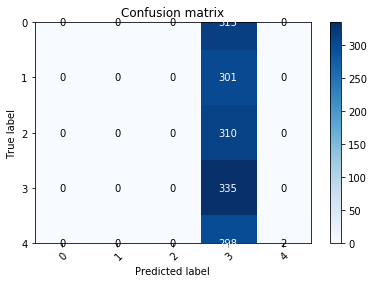

In [14]:
class_names = np.unique(y)
plot_confusion_matrix(y, s_pred, classes=class_names, title='Confusion matrix')

In [15]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [16]:
#df.Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "business+intelligence"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+scientist"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+analyst"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "full+stack+developer"].Text_3.str.split(expand=True).stack().value_counts()
#df.loc[df["job_class"] == "data+engineer"].Text_3.str.split(expand=True).stack().value_counts()

In [17]:
def plot_dim_red(model, features, labels, n_components=2):
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'business intelligence',
        "1": 'data analyst',
        "2": 'data engineer',
        "3": 'data scientist',
        "4": 'full stack developer'
    }
    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.set_palette("hls", 5)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "orange", "darkgreen", "blue", "purple"],
                    alpha=.7).set_title(title);

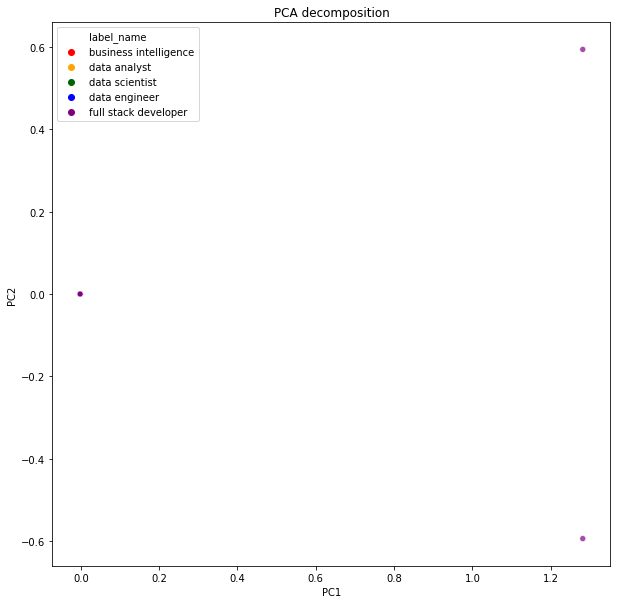

In [18]:
plot_dim_red("PCA", features=x_tfidf.toarray(), labels=y, n_components=2)
#help(PCA.fit_transform)
#x_tfidf
#help(sns.set_palette)

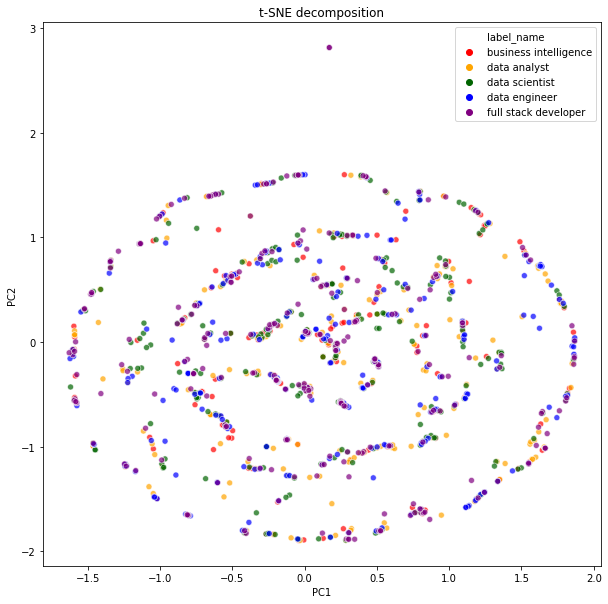

In [19]:
plot_dim_red("TSNE", features=x_tfidf.toarray(), labels=y, n_components=2)

In [20]:
x_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13044187, 0.13044187, 0.13044187, ..., 0.20659777, 0.13044187,
        0.        ],
       [0.16355223, 0.16355223, 0.08177611, ..., 0.        , 0.08177611,
        0.17269264]])

In [21]:
df["SVM_Prediction"] = s_pred

In [22]:
df.head()

,Unnamed: 0,state,full_job_title,company_name,url,job_class,Text,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2,SVM_Prediction
0,1,Hauts-de-Seine,Responsable Applicatif BI (Business Intelligence),TalentsIt,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE,vide,vide,[vide],[vide],vide,[],3
1,2,Hauts-de-Seine,ANALYSTE BUSINESS INTELLIGENCE H/F,Janssen,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE,vide,vide,[vide],[vide],vide,[],3
2,3,Hauts-de-Seine,Stage Chargé de e-commerce H/F - Paris,Jobmania,http://www.indeed.fr/pagead/clk?mo=r&ad=-6NYlb...,business+intelligence,VIDE,vide,vide,[vide],[vide],vide,[],3
3,4,Hauts-de-Seine,Stage Business Intelligence Analyst H/F,Costa Croisières,http://www.indeed.fr/company/Costa-Crociere/jo...,business+intelligence,VIDE,vide,vide,[vide],[vide],vide,[],3
4,5,Hauts-de-Seine,Chargé Business Dévelopment H/F,Impact Sales & Marketing,http://www.indeed.fr/company/Impact-Field-Mark...,business+intelligence,VIDE,vide,vide,[vide],[vide],vide,[],3


In [23]:
df.to_csv("predictions.csv", encoding='utf-8')